In [ ]:
import random
import sys

import matplotlib.pyplot as plt
from scipy.special import erfc

import Utils as utils
import NeuralNetworkCorrection as network
import numpy as np

In [9]:
# Gerar dados de treinamento
word_length = 2 ** 2 # Tamanho padrão da entrada do hamming
noise_rates = np.linspace(0.01, 0.2, 100)
sample_length = 10 ** 3
epoches = 50
Eb_dB_values = np.arange(-2, 11, 1)
noisy_data = []
original_data = []

for eb_db in Eb_dB_values:
    corrompida, original = network.generate_data_for_training(1, sample_length, eb_db)
    noisy_data.append(corrompida)
    original_data.append(original)

In [10]:
# Criar e treinar a rede neural
model = network.train_neural_network(noisy_data, original_data, epoches, word_length)

[[0 0 0 ... 0 0 0]
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 1 0 ... 0 1 0]
 [0 0 1 ... 0 0 1]
 [1 1 0 ... 0 0 1]]
[[0 0 0 0]
 [1 1 0 1]
 [1 1 1 1]
 ...
 [0 0 1 0]
 [1 0 0 1]
 [0 0 0 1]]
Epoch 1/50
102/102 [==============================] - 2s 4ms/step - loss: 0.6771 - accuracy: 0.1945
Epoch 2/50
102/102 [==============================] - 0s 3ms/step - loss: 0.6253 - accuracy: 0.4920
Epoch 3/50
102/102 [==============================] - 0s 3ms/step - loss: 0.5618 - accuracy: 0.5902
Epoch 4/50
102/102 [==============================] - 0s 3ms/step - loss: 0.4760 - accuracy: 0.4797
Epoch 5/50
102/102 [==============================] - 0s 3ms/step - loss: 0.4179 - accuracy: 0.4631
Epoch 6/50
102/102 [==============================] - 0s 3ms/step - loss: 0.3843 - accuracy: 0.4492
Epoch 7/50
102/102 [==============================] - 0s 3ms/step - loss: 0.3606 - accuracy: 0.4806
Epoch 8/50
102/102 [==============================] - 0s 3ms/step - loss: 0.3398 - accuracy: 0.4985
Epoch 9/

In [11]:
# Gerar dados de teste
amostras_ruidosas = []
amostras_originais = []
for eb_db in Eb_dB_values:
    ruidosa, original = network.generate_data_for_training(1, 10**4, eb_db)
    amostras_originais.append(original)
    amostras_ruidosas.append(ruidosa)


In [12]:
# Decodificar e corrigir os bits usando a rede neural
amostras_decodificadas = []
#for amostra_ruidosa in amostras_ruidosas:
 #   amostras_decodificadas.append(network.decode_and_correct(amostra_ruidosa, model))

In [13]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[0], model))

1/1 [==============================] - 0s 24ms/step


In [14]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[1], model))


1/1 [==============================] - 0s 25ms/step


In [15]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[2], model))


1/1 [==============================] - 0s 45ms/step


In [16]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[3], model))


1/1 [==============================] - 0s 29ms/step


In [17]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[4], model))


1/1 [==============================] - 0s 37ms/step


In [18]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[5], model))


1/1 [==============================] - 0s 28ms/step


In [19]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[6], model))


1/1 [==============================] - 0s 34ms/step


In [20]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[7], model))


1/1 [==============================] - 0s 32ms/step


In [21]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[8], model))


1/1 [==============================] - 0s 28ms/step


In [22]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[9], model))


1/1 [==============================] - 0s 27ms/step


In [23]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[10], model))


1/1 [==============================] - 0s 25ms/step


In [24]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[11], model))


1/1 [==============================] - 0s 34ms/step


In [25]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[12], model))


1/1 [==============================] - 0s 34ms/step


In [27]:
bers = []
for i in range(0, len(amostras_decodificadas)):
    bers.append(np.sum(np.array(amostras_decodificadas[i]).astype(int) != amostras_originais[i]) / len(amostras_originais[i]))


[array([0, 1, 1, ..., 0, 1, 0]), array([0, 1, 1, ..., 1, 0, 1]), array([0, 1, 0, ..., 0, 0, 0]), array([1, 0, 0, ..., 1, 0, 0]), array([1, 1, 1, ..., 0, 1, 0]), array([1, 1, 0, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 1, 0]), array([0, 1, 1, ..., 1, 0, 1]), array([1, 1, 0, ..., 0, 1, 0]), array([0, 1, 0, ..., 1, 1, 1]), array([1, 0, 1, ..., 1, 0, 0]), array([1, 0, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 1, 1, 1])]


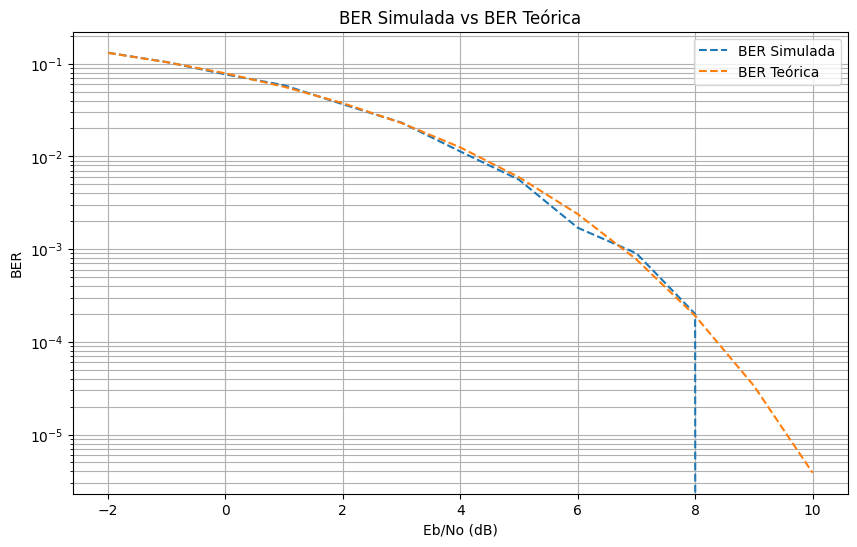

In [28]:
# Calcular a BER teórica
Eb_values = 10**(Eb_dB_values / 10)
BER_teorica = 0.5 * erfc(np.sqrt(Eb_values))

# Plotar as taxas de erro de bit simuladas e teóricas
plt.figure(figsize=(10, 6))
plt.semilogy(Eb_dB_values, bers, linestyle = '--', label='BER Simulada')
plt.semilogy(Eb_dB_values, BER_teorica, linestyle='--', label='BER Teórica')
plt.xlabel('Eb/No (dB)')
plt.ylabel('BER')
plt.grid(True, which='both')
plt.legend()
plt.title('BER Simulada vs BER Teórica')
plt.show()

In [32]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 4)                 32        
                                                                 
Total params: 144 (576.00 Byte)
Trainable params: 144 (576.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [30]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
